In [2]:
# Imports and plotting setups
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math

import math_funcs

from scipy.constants import (
    epsilon_0,   # Permittivity of free space (vacuum)
    mu_0,        # Permeability of free space (vacuum)
    c,           # Speed of light in vacuum
    #e,           # Elementary charge
    #h,           # Planck constant
    #hbar,        # Reduced Planck constant (h-bar)
    k,           # Boltzmann constant
    #G,           # Newtonian constant of gravitation
    #m_e,         # Electron mass
    #m_p,         # Proton mass
    #m_n,         # Neutron mass
    #alpha,       # Fine-structure constant
    eV,          # Electron volt
)

In [3]:
dd = 22.4
hours = 24 * dd / 360
dd, hours, 360/24

(22.4, 1.4933333333333332, 15.0)

In [4]:
class point_celestial_sphere:
    def __init__(self):
        self.declination = 0 # degrees
        # +90 degrees declination is north pole of celestial sphere
        # -90 is the south pole
        # By definition the Earth's north pole is always in the north celestial sphere, 
        # and vice versa for the south
        self.right_hand_ascension = 0 # degrees
        # range is 0 to 24 hours, and customarily reported in hours minutes seconds
        # reference point is the march equinox, when the sub solar point travels from south (-dec) to north (+dec)
        # positive is east

    def __str__(self):
        return f'Declination = {self.declination}, Right hand ascension = {self.right_hand_ascension}'
    
    def __repr__(self):
        return self.__str__()

    def get_location(self, format='dd/time'):
        declination = None
        right_hand_ascension = None
        if format == 'dd/time':
            declination = self.declination
            rh_seconds = 24 * 60 * 60 * self.right_hand_ascension / 360
            rh_minutes, rh_seconds = divmod(rh_seconds, 60)
            rh_hours, rh_minutes = divmod(rh_minutes, 60)
            right_hand_ascension = (rh_hours, rh_minutes, rh_seconds)
        elif format=='degrees':
            declination = self.declination
            right_hand_ascension = self.right_hand_ascension
        elif format=='radians':
            declination = np.deg2rad(declination)
            right_hand_ascension = np.deg2rad(right_hand_ascension)
        else:
            raise(ValueError('format must be set to \'dd/time\', \'degrees\', or \'radians\''))
        
        return declination, right_hand_ascension
        
    def set_location(self, declination, right_hand_ascension, format='dd/time'):
        if format == 'dd/time' or format=='dms/time':
            rh_hours, rh_minutes, rh_seconds = right_hand_ascension
            if rh_hours < 0 or rh_minutes < 0 or rh_seconds < 0:
                raise ValueError('Right hand ascension must be positive')
            if rh_hours >= 24 or rh_minutes >= 60 or rh_seconds >= 60 :
                raise ValueError('Right hand ascension not in valid range')
            # convert to degrees
            right_hand_ascension = rh_hours * (360/24) + rh_minutes * ((360/24)/60) + rh_seconds * ((360/24)/60/60)

            if format=='dms/time':
                dd, d_minutes, d_seconds = declination
                sign = 1
                if dd < 0:
                    sign = -1
                if d_minutes < 0 or d_seconds < 0:
                    raise(Warning('Declination minutes and seconds are negative numbers! Only the degrees are allowed to be negative.'))
                declination = dd + sign * d_minutes/60 + sign * d_seconds/3600
        elif format=='degrees':
            pass
        elif format=='radians':
            declination = np.rad2deg(declination)
            right_hand_ascension = np.rad2deg(right_hand_ascension)
        else:
            raise(ValueError('format must be set to \'dd/time\', \'dms/time\', \'degrees\', or \'radians\''))

        if declination > 90 or declination < -90:
            raise ValueError('Declination must be between +90 and -90')
        if right_hand_ascension >= 360 or right_hand_ascension < 0:
            raise ValueError('Right hand ascension must be between 0 and 360 degrees or 0 degrees')
        
        self.declination = declination
        self.right_hand_ascension = right_hand_ascension

# Reid, M. J.; Brunthaler, A. (December 2004). "The Proper Motion of Sagittarius A*. II. The Mass of Sagittarius A*"
sag_A = point_celestial_sphere()
sag_A.set_location((-29,0,28.118), (17, 45, 40.0409), format='dms/time')

sag_A, sag_A.get_location(format='dd/time')

(Declination = -29.007810555555555, Right hand ascension = 266.41683708333335,
 (-29.007810555555555, (17.0, 45.0, 40.040899999999965)))

In [5]:
import time
from math_funcs import cosd, sind, tand
epoch_sec = time.time() # seconds since Jan 1st 1970
# convert to days since Jan 1st 1950
epoch_days = epoch_sec / (24 * 60 * 60) # days since 01/01/1970
# seconds in a year (including leap years averaged in as Julian ephemeris)
epoch_days = epoch_days + (1970 - 1950) * (365.25) # days since 01/01/1950
# add in the offset

off_0 = epoch_days / 36525 # centuries since 1950
off_1 = 19.2 + 4850.7 * off_0
off_2 = 120.8 + 1191.3 * off_0
off_3 = 349.5 + 262.1 * off_0
off_4 = 198.3 + 64.3 * off_0
off_5 = 241.6 + 2382.6 * off_0
off_6 = 317.7 + 6070.0 * off_0

europas_north_pole = point_celestial_sphere()
europas_north_pole.set_location(
    64.516 + 0.0033*off_0 + 0.468*cosd(off_2) + 0.026*cosd(off_3) + 0.007*cosd(off_4) + 0.002*cosd(off_5),
    268.029 - 0.0085*off_0 + 1.086*sind(off_2) + 0.060*sind(off_3) + 0.015*sind(off_4) + 0.009*sind(off_5),
    format='degrees'
)

W = 156.9 + 101.3747235*epoch_days - 0.980*sind(off_2) - 0.054*sind(off_3) - 0.014*sind(off_4) - 0.008*sind(off_5) # deg
W = W % 360

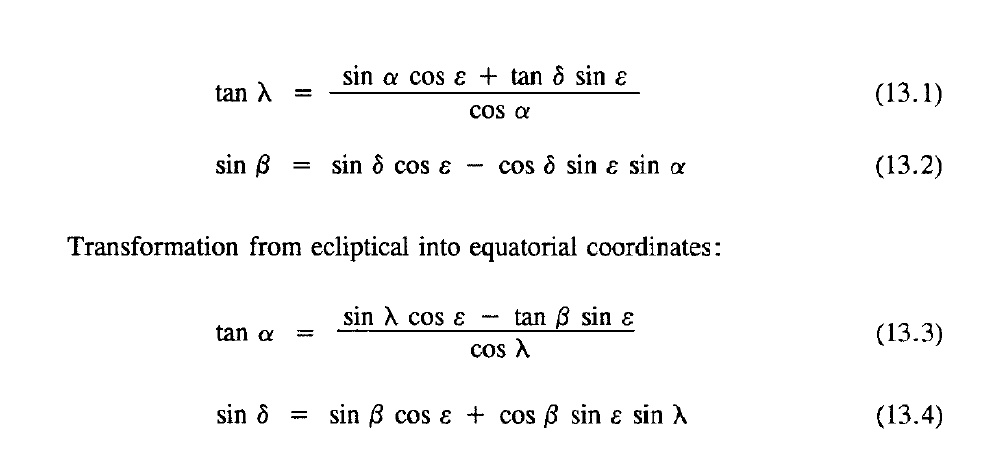

In [13]:
europas_obliquity = 90 - europas_north_pole.declination #degrees

europas_sag_A_long = np.arctan((sind(sag_A.right_hand_ascension) * cosd(europas_obliquity) \
    + tand(sag_A.declination) * sind(europas_obliquity)) / cosd(europas_obliquity))
europas_sag_A_long = np.rad2deg(europas_sag_A_long)

europas_sag_A_lat = np.arcsin(sind(sag_A.declination) * cosd(europas_obliquity) \
    - cosd(sag_A.declination) * sind(europas_obliquity) * sind(sag_A.right_hand_ascension))
europas_sag_A_lat = np.rad2deg(europas_sag_A_lat)

europas_sag_A_lat, europas_sag_A_long

(-3.733930585314238, -51.57017719284822)

In [14]:
def convert_to_equitorial_coordinates(right_hand_ascension, declination, obliquity):
    long = np.arctan((sind(right_hand_ascension) * cosd(obliquity) \
    + tand(declination) * sind(obliquity)) / cosd(obliquity))
    long = np.rad2deg(long)

    lat = np.arcsin(sind(declination) * cosd(obliquity) \
        - cosd(declination) * sind(obliquity) * sind(right_hand_ascension))
    lat = np.rad2deg(lat)

    return lat, long

europas_obliquity = 90 - europas_north_pole.declination #degrees
convert_to_equitorial_coordinates(sag_A.right_hand_ascension, sag_A.declination, europas_obliquity)

(-3.733930585314238, -51.57017719284822)

In [15]:
# Reid, M. J.; Brunthaler, A. (December 2004). "The Proper Motion of Sagittarius A*. II. The Mass of Sagittarius A*"
sag_A = point_celestial_sphere()
sag_A.set_location((-29,0,28.118), (17, 45, 40.0409), format='dms/time')

sag_A, sag_A.get_location(format='dd/time')

europas_sag_A_lat, europas_sag_A_long = convert_to_equitorial_coordinates(sag_A.right_hand_ascension, sag_A.declination, europas_obliquity)

europas_sag_A_long_relative_subjovian = (europas_sag_A_long - W) % 360
europas_sag_A_long_relative_antijovian = (europas_sag_A_long - W - 180) % 360
europas_sag_A_long_relative_antiorbital = (europas_sag_A_long - W + 90) % 360

europas_sag_A_long = europas_sag_A_long_relative_subjovian

europas_sag_A_lat, europas_sag_A_long

(-3.733930585314238, 257.32155060809845)

In [16]:
caph = point_celestial_sphere()
caph.set_location((59, 17, 31.9), (00, 10, 30), format='dms/time')

europas_caph_lat, europas_caph_long = convert_to_equitorial_coordinates(caph.right_hand_ascension, caph.declination, europas_obliquity)

europas_caph_long_relative_subjovian = (europas_caph_long - W) % 360
europas_caph_long_relative_antijovian = (europas_caph_long - W - 180) % 360
europas_caph_long_relative_antiorbital = (europas_caph_long - W + 90) % 360

europas_caph_long = europas_caph_long_relative_subjovian

europas_caph_lat, europas_caph_long

(50.10419331003118, 348.99701151531445)

In [17]:
T_A_DAM_low_band = 10**11 #K
T_A_DIM_high_band = 10**2 #K
T_A_gal_low_band = 10**7 # K
T_A_gal_high_band = T_A_DIM_high_band
T_B_coldspace = 2.7 #K


/var/folders/q_/j0nfhbld0vbcnzffn6594bzh0000gn/T/ipykernel_44529/2707815066.py:53: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(U, V, c=10 * np.nan_to_num(np.log10(T_Bv.reshape(theta_grid_rad.shape)[0:91].flatten()))
/var/folders/q_/j0nfhbld0vbcnzffn6594bzh0000gn/T/ipykernel_44529/2707815066.py:53: RuntimeWarning: overflow encountered in multiply
  plt.scatter(U, V, c=10 * np.nan_to_num(np.log10(T_Bv.reshape(theta_grid_rad.shape)[0:91].flatten()))


99.99999999999869

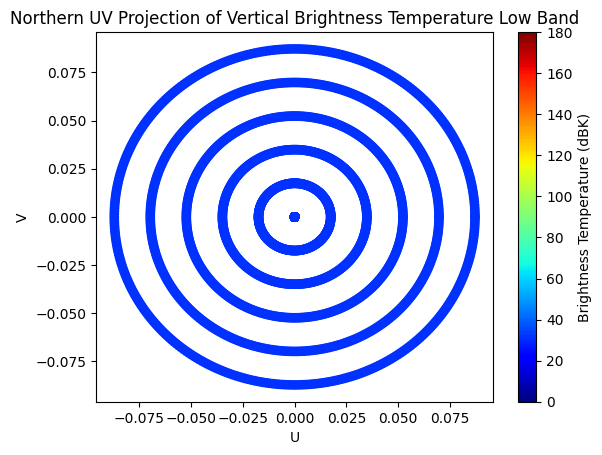

In [20]:
# In the above we located the center of the galaxy on the horizon.
# Now we are going to deconvolve the highly structured UHF radiation 
# from just the location of the Sagittarius A
# And the less structured... but still structured HF radiation from the 
# entire body of the galaxy

# Citation for this structure is
# Manning, R. and Dulk, G.A. "The Galactic background radiation from 0.2 to 13.8 MHz" 2001.

from T_B_Europan_sky import angle_grid
from T_B_Europan_sky import deconvolve_Cecconi_T_A_to_T_B

ag = angle_grid(1, 1)
theta, phi, \
    phi_grid, theta_grid  = ag.get_angle_grid()

# Draw the galactic background
# High band
W_v = np.zeros_like(theta_grid, dtype=float).flatten()
W_h = np.zeros_like(theta_grid, dtype=float).flatten()

for i in np.arange(theta_grid.size):
    theta = theta_grid.flatten()[i]
    phi = phi_grid.flatten()[i]
    if theta <= 5: # directly overhead 
        if phi >= 0 and phi <= 360:
            W_v[i] = 0.5
            W_h[i] = 0.5

T_Bv, T_Bh = deconvolve_Cecconi_T_A_to_T_B(ag, W_h, W_v, T_A_gal_high_band)

T_A = 0

for i in np.arange(theta_grid.size):
    theta = theta_grid.flatten()[i]
    phi = phi_grid.flatten()[i]

    dsteradians = np.abs(np.sin(theta)) * ag.dtheta_rad * ag.dphi_rad
    
    T_A += T_Bv[i] * (3/2) * (np.sin(theta))**2 * dsteradians
    T_A += T_Bh[i] * (3/2) * (np.sin(theta))**2 * dsteradians

T_A *= (1 / (4* np.pi))

# Plot only the Northern Hemisphere of the brightness temperature
theta_grid_rad = np.deg2rad(theta_grid)
phi_grid_rad = np.deg2rad(phi_grid)

U = (np.sin(theta_grid_rad[0:91]) * np.cos(phi_grid_rad[0:91])).flatten()
V = (np.sin(theta_grid_rad[0:91]) * np.sin(phi_grid_rad[0:91])).flatten()

plt.figure()
plt.scatter(U, V, c=10 * np.nan_to_num(np.log10(T_Bv.reshape(theta_grid_rad.shape)[0:91].flatten()))
    , cmap='jet', vmin=0, vmax=180)
plt.colorbar(label='Brightness Temperature (dBK)')
plt.xlabel('U')
plt.ylabel('V')
plt.title('Northern UV Projection of Vertical Brightness Temperature Low Band')

T_A

/var/folders/q_/j0nfhbld0vbcnzffn6594bzh0000gn/T/ipykernel_44529/2020843212.py:52: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(U, V, c=10 * np.nan_to_num(np.log10(T_Bv.reshape(theta_grid_rad.shape)[0:91].flatten()))
/var/folders/q_/j0nfhbld0vbcnzffn6594bzh0000gn/T/ipykernel_44529/2020843212.py:52: RuntimeWarning: overflow encountered in multiply
  plt.scatter(U, V, c=10 * np.nan_to_num(np.log10(T_Bv.reshape(theta_grid_rad.shape)[0:91].flatten()))


10000000.000000719

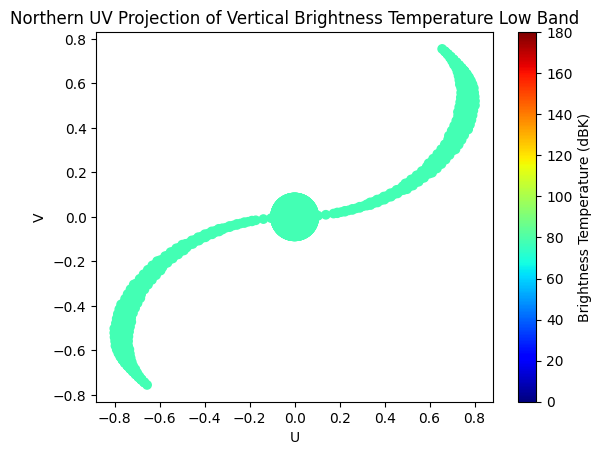

In [24]:

from T_B_Europan_sky import angle_grid
from T_B_Europan_sky import deconvolve_Cecconi_T_A_to_T_B

ag = angle_grid(1, 1)
theta, phi, \
    phi_grid, theta_grid  = ag.get_angle_grid()

# Draw the galactic background
# Low band
W_v = np.zeros_like(theta_grid, dtype=float).flatten()
W_h = np.zeros_like(theta_grid, dtype=float).flatten()

for i in np.arange(theta_grid.size):
    theta = theta_grid.flatten()[i]
    phi = phi_grid.flatten()[i]
    if theta <= 5: # directly overhead 
        if phi >= 0 and phi <= 360:
            W_v[i] = 0.5
            W_h[i] = 0.5

    if phi >= theta * (45 / 100) and phi <= theta * (55/100):
        W_v[i] = 0.5
        W_h[i] = 0.5

    if phi >= theta * (45 / 100) + 180 and phi <= theta * (55/100) + 180:
        W_v[i] = 0.5
        W_h[i] = 0.5

T_Bv, T_Bh = deconvolve_Cecconi_T_A_to_T_B(ag, W_h, W_v, T_A_gal_low_band)

T_A = 0

for i in np.arange(theta_grid.size):
    theta = theta_grid.flatten()[i]
    phi = phi_grid.flatten()[i]

    dsteradians = np.abs(np.sin(theta)) * ag.dtheta_rad * ag.dphi_rad
    
    T_A += T_Bv[i] * (3/2) * (np.sin(theta))**2 * dsteradians
    T_A += T_Bh[i] * (3/2) * (np.sin(theta))**2 * dsteradians

T_A *= (1 / (4* np.pi))

# Plot only the Northern Hemisphere of the brightness temperature
theta_grid_rad = np.deg2rad(theta_grid)
phi_grid_rad = np.deg2rad(phi_grid)

U = (np.sin(theta_grid_rad[0:91]) * np.cos(phi_grid_rad[0:91])).flatten()
V = (np.sin(theta_grid_rad[0:91]) * np.sin(phi_grid_rad[0:91])).flatten()

plt.figure()
plt.scatter(U, V, c=10 * np.nan_to_num(np.log10(T_Bv.reshape(theta_grid_rad.shape)[0:91].flatten()))
    , cmap='jet', vmin=0, vmax=180)
plt.colorbar(label='Brightness Temperature (dBK)')
plt.xlabel('U')
plt.ylabel('V')
plt.title('Northern UV Projection of Vertical Brightness Temperature Low Band')

T_A

